In [476]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

# Import data

In [444]:
import os
import glob

df=pd.DataFrame()
for filepath in glob.glob(os.path.join('raw_data', '*.txt')):
    tmp=pd.read_csv(filepath,header=None)
    tmp.columns=['Trial','ChartType','RealRatio','InputRatio','indexDif']
    #tmp= tmp.insert(loc=1, column='ID', value=filepath[9:][:-4])
    tmp['Name']=filepath[9:][:-4]
    if len(df)==0:
        df=tmp
    else:
        df=df.append(tmp).reset_index(drop=True)
df.head(3)

,Trial,ChartType,RealRatio,InputRatio,indexDif,Name
0,1,Bubble,0.608244,0.9,0,MeijieWang
1,2,Bubble,0.548130,0.7,0,MeijieWang
2,3,Pie,0.600000,0.7,8,MeijieWang


# Compute error

In [445]:
#compute error
error=abs(df.RealRatio-df.InputRatio)*100+(1/8)
error[error<1]=1
df['log']=pd.DataFrame(np.log2(error))
df.head(5)

,Trial,ChartType,RealRatio,InputRatio,indexDif,Name,log
0,1,Bubble,0.608244,0.9,0,MeijieWang,4.872858
1,2,Bubble,0.548130,0.7,0,MeijieWang,3.936590
2,3,Pie,0.600000,0.7,8,MeijieWang,3.339850
3,4,Bubble,0.594684,0.6,0,MeijieWang,0.000000
4,5,Line,0.567568,0.5,2,MeijieWang,2.782777


# Divide data by chartType

In [446]:
#Divide data by chartType
Piedf=df[df.ChartType=="Pie"].reset_index(drop=True)
Bubbledf=df[df.ChartType=="Bubble"].reset_index(drop=True)
Linedf=df[df.ChartType=="Line"].reset_index(drop=True)

# Average error

In [475]:
summary=pd.DataFrame()
summary['Type']=["Pie","Bubble","Line"]
summary['mean']=[Piedf.log.mean(),Bubbledf.log.mean(),Linedf.log.mean()]
summary

,Type,mean
0,Pie,2.610264
1,Bubble,3.127869
2,Line,3.592643


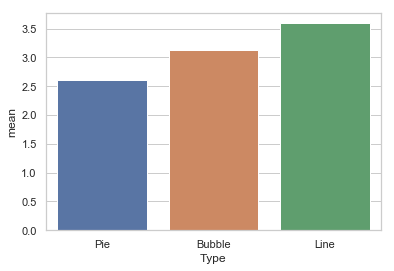

In [483]:
sns.set(style="whitegrid")
x = sns.barplot(x="Type", y="mean", data=summary)

# Bootstrapped  CI

In [449]:
def bootstrapList(df,n=None):
    """ Bootstrap resample mean array
    Parameters
    ----------
    df : a dataframe wigh "log" column
    n : int, optional
      length of resampled array, equal to len(X) if n==None
      
    Results
    -------
    returns resamples log error mean array
    """
    length=len(df)
    if n==None:
        n=length
    indexArray=np.random.randint(0,length,n)
    resample=np.array(df.log)[indexArray]
    return resample

#95% CI
def CI(Array):
    n=len(Array)
    mean=Array.mean()
    std=Array.std()
    cih=mean + 1.96*std/math.sqrt(n)
    cil=mean - 1.96*std/math.sqrt(n)
    return cil,cih

In [450]:
PieCIL,PieCIH=CI(bootstrapList(Piedf,n=1000))
LineCIL,LineCIH=CI(bootstrapList(Linedf,n=1000))
BubbleCIL,BubbleCIH=CI(bootstrapList(Bubbledf,n=1000))
summary['CIL']=[PieCIL,BubbleCIL,LineCIL]
summary['CIH']=[PieCIH,BubbleCIH,LineCIH]
summary

,Type,mean,CIL,CIH
0,Pie,2.610264,2.557713,2.739711
1,Bubble,3.127869,3.051828,3.224021
2,Line,3.592643,3.530805,3.713665
